# Натянуть сову на линейное пространство

Создайте эмбеддинги слов и визуализируйте векторные операции над ними: сложение, вычитание, взятие ближайшего, дальнейшего и прочее. Сравните качество представлений gensim и BERT с точки зрения операций над словами, докажите примерами.

Для создания эмбеддингов с gensim обучите модель на нормализованных текстовых данных. Данные найдите на kaggle или выберите один из предложенных датасетов. Для создания эмбеддингов с BERT используйте предобученные модели.

Предлагаемые датасеты:
 - [sentiment твитов про ковид](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification)
 - [Amazon product reviews](https://www.kaggle.com/kashnitsky/hierarchical-text-classification)
 - [Отзывы интернет-магазина](https://www.kaggle.com/shymammoth/shopee-reviews)
 - [Тексты статей конференции NIPS](https://www.kaggle.com/rowhitswami/nips-papers-1987-2019-updated?select=papers.csv)

# Projector

Из прошлого задания вы выяснили наиболее хорошую для представления связей между словами модель. Спроецируйте ~2-3 тысячи наиболее популярных слов из выбранного корпуса в tensorflow projector.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import umap
import numpy as np

from utils import preprocess

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michael/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/michael/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df_train = pd.read_csv('./data/Corona_NLP_train.csv',encoding='ISO-8859-1')
print("train shape: ", df_train.shape)

train shape:  (41157, 6)


In [3]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
df_train.drop_duplicates(subset='OriginalTweet',inplace=True)
texts = df_train.OriginalTweet.apply(preprocess.preprocess_text)

In [6]:
print(df_train.OriginalTweet)

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object


In [7]:
print(texts)

0                                                         
1        advice talk neighbour family exchange phone nu...
2        coronavirus australia woolworth give elderly d...
3        food stock one emptyplease dont panic enough f...
4        ready go supermarket covid outbreaknot im para...
                               ...                        
41152    airline pilot offering stock supermarket shelf...
41153    response complaint provided citing covid relat...
41154    know getting tough rationing toilet paper coro...
41155    wrong smell hand sanitizer starting turn oncor...
41156    well newused rift going amazon rn although nor...
Name: OriginalTweet, Length: 41157, dtype: object


# gensim

In [8]:
comms = [i.split() for i in texts]
words = {}
for sentence in comms:
    for word in sentence:
        words[word] = (words.get(word) or 0) + 1

words_freq = list(dict(sorted(words.items(), key=lambda item: item[1])).keys())[::-1]
print(words_freq)

['covid', 'coronavirus', 'price', 'store', 'supermarket', 'food', 'grocery', 'people', 'consumer', 'amp', 'shopping', 'online', 'need', 'pandemic', 'time', 'get', 'u', 'worker', 'hand', 'go', 'panic', 'like', 'home', 'demand', 'sanitizer', 'help', 'stock', 'one', 'going', 'supply', 'day', 'due', 'work', 'mask', 'dont', 'new', 'oil', 'buying', 'week', 'crisis', 'business', 'please', 'toiletpaper', 'toilet', 'make', 'retail', 'shop', 'delivery', 'local', 'shelf', 'market', 'paper', 'good', 'today', 'keep', 'stay', 'buy', 'im', 'see', 'many', 'via', 'still', 'essential', 'say', 'take', 'know', 'lockdown', 'customer', 'virus', 'service', 'stop', 'would', 'outbreak', 'way', 'staff', 'employee', 'thing', 'product', 'could', 'social', 'health', 'even', 'spread', 'company', 'also', 'everyone', 'working', 'impact', 'think', 'right', 'government', 'world', 'amid', 'cant', 'item', 'use', 'safe', 'socialdistancing', 'order', 'country', 'line', 'family', 'thank', 'every', 'want', 'back', 'may', 'mu

In [9]:
%%time

from gensim.models import Word2Vec

gmodel = Word2Vec( sentences=comms
                 , sg=False  # cbow model
                 , vector_size=100
                 , window=5
                 , seed=0
                 , epochs=15
                 , min_count=1
                 , workers=8
                 )
print('размерность векторов слов в модели:', gmodel.wv.vectors.shape)

размерность векторов слов в модели: (52177, 100)
CPU times: user 24.7 s, sys: 293 ms, total: 25 s
Wall time: 7.3 s


In [10]:
def most_similar(word):
    return gmodel.wv.most_similar(gmodel.wv[word])

def least_similar(word):
    return gmodel.wv.most_similar(gmodel.wv[word], topn=len(gmodel.wv))[-1:-11:-1]
    # return gmodel.wv.similar_by_vector(-gmodel.wv[word])

def add(word1, word2):
    vec1 = gmodel.wv[word1]
    vec2 = gmodel.wv[word2]
    return gmodel.wv.similar_by_vector(np.array(vec1) + np.array(vec2))

def sub(word1, word2):
    vec1 = gmodel.wv[word1]
    vec2 = gmodel.wv[word2]
    return gmodel.wv.similar_by_vector(np.array(vec1) - np.array(vec2))


In [11]:
points = umap.UMAP(random_state=42).fit_transform(gmodel.wv.vectors[:1000])

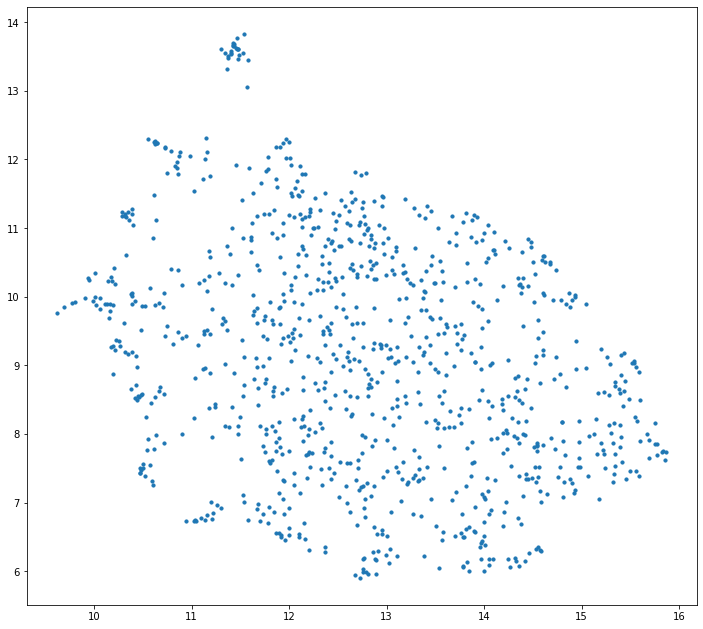

In [12]:
plt.figure(figsize=(12, 11))
plt.scatter(x=points[:, 0], y=points[:, 1], s=10)

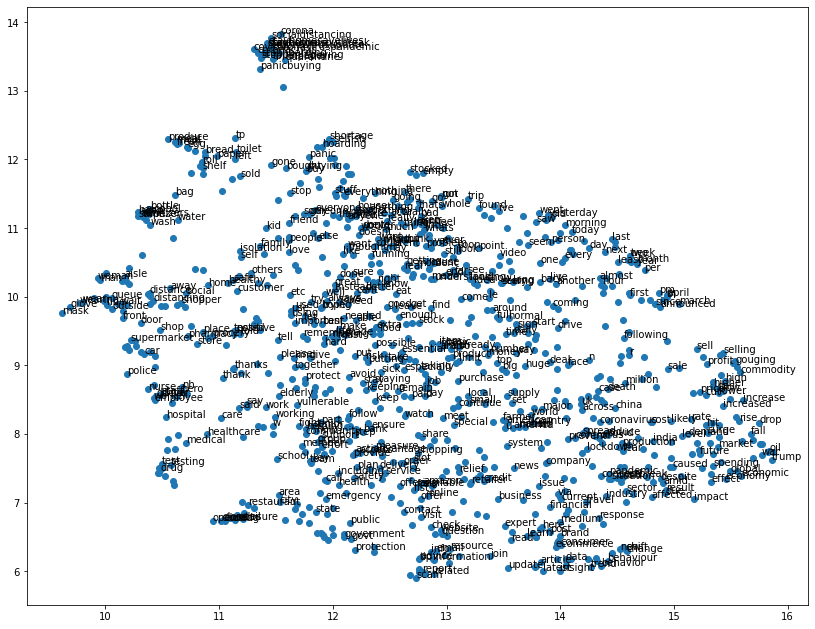

In [13]:
fig, ax = plt.subplots(figsize=(14, 11))
ax.scatter(points[:, 0], points[:, 1])

for i, txt in enumerate(gmodel.wv.index_to_key[:500]):
    ax.annotate(txt, (points[i, 0], points[i, 1]))

[('doctor', 0.845425546169281), ('person', 0.8006120324134827), ('cashier', 0.7165483832359314), ('nurse', 0.7051753997802734), ('brave', 0.6876882910728455), ('checkout', 0.6733484268188477), ('papa', 0.6661966443061829), ('icu', 0.6571469306945801), ('child', 0.6462159156799316), ('forthe', 0.645099401473999)]


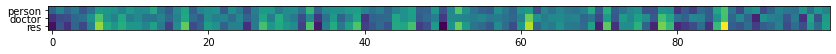

In [25]:
l = "person"
r = "doctor"
l_vec = gmodel.wv[l]
r_vec = gmodel.wv[r]
res = add(l, r)
print(res)
res_vec = np.array(l_vec) + np.array(r_vec)
plt.figure(figsize=(14, 14))
le = 3
plt.yticks(range(0, le), [l, r, 'res'])
plt.imshow(np.stack([l_vec, r_vec, res_vec]))
plt.show()

[('man', 0.9614821672439575), ('woman', 0.7818394303321838), ('lady', 0.7753953337669373), ('coughed', 0.7589557766914368), ('hurtin', 0.7398902177810669), ('poptarts', 0.7228968739509583), ('allegedly', 0.7190856337547302), ('coughing', 0.7111141085624695), ('palsy', 0.7002626657485962), ('stabbed', 0.6947013139724731)]


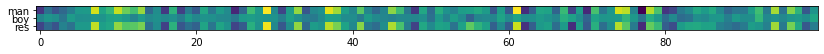

In [26]:
l = "man"
r = "boy"
l_vec = gmodel.wv[l]
r_vec = gmodel.wv[r]
res = sub(l, r)
print(res)
res_vec = np.array(l_vec) - np.array(r_vec)
plt.figure(figsize=(14, 14))
le = 3
plt.yticks(range(0, le), [l, r, 'res'])
plt.imshow(np.stack([l_vec, r_vec, res_vec]))
plt.show()

In [29]:
most_similar("doctor")

[('doctor', 1.0000001192092896),
 ('nurse', 0.8353358507156372),
 ('teacher', 0.7638800740242004),
 ('hmh', 0.7602682113647461),
 ('pharmacist', 0.738320529460907),
 ('collector', 0.7329273223876953),
 ('forthe', 0.73199462890625),
 ('officer', 0.7291435599327087),
 ('garbage', 0.7228317260742188),
 ('cashier', 0.7165514826774597)]

In [28]:
least_similar("health")

[('californiano', -0.4284166395664215),
 ('happenedi', -0.4064088463783264),
 ('rollonly', -0.40281105041503906),
 ('quarenteen', -0.392863392829895),
 ('ororo', -0.3836563527584076),
 ('hp', -0.3786531090736389),
 ('facetouch', -0.3745819330215454),
 ('covidhints', -0.37255868315696716),
 ('wrestler', -0.35352009534835815),
 ('deliverone', -0.3534802794456482)]

# BERT

In [30]:
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # возращать эмбеддинги каждого слова
                                  )
model.eval()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [31]:
def get_bert_vector(word):
    # word = "[CLS] " + word + " [SEP]"
    tokenized_query = tokenizer.tokenize(word)
    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_query)
    tokens_tensor = torch.tensor([indexed_tokens])
    outputs = model(tokens_tensor)
    embeddings = outputs[2]
    last_layer_embs = embeddings[-1]
    word_embedding = last_layer_embs.squeeze(0).sum(dim=0)
    return word_embedding


In [32]:
get_bert_vector("dad")

tensor([-5.3917e-01,  3.8087e-01,  1.5748e-01, -1.7968e-01, -3.8489e-01,
        -5.1503e-01,  5.2192e-01,  5.0922e-01, -1.4831e-01, -6.6454e-01,
        -9.2899e-01,  6.1542e-01, -1.3272e-01,  3.4833e-01, -3.0801e-01,
         6.5846e-01,  2.9857e-01, -5.2983e-01,  1.9287e-01, -6.9580e-01,
        -4.3156e-01, -4.5149e-02,  3.8568e-01,  7.3838e-01,  4.7718e-01,
        -8.5122e-01,  3.1412e-01,  3.9521e-01, -1.8263e-01, -1.1371e-01,
         4.6690e-01,  4.7483e-01,  2.7986e-01,  2.0047e-02, -8.7150e-02,
        -6.7639e-02,  1.2109e+00, -2.8325e-01, -1.1688e-01,  5.6194e-01,
         1.7793e-01, -2.3061e-01,  4.5847e-01, -1.7817e-01, -3.0491e-01,
        -1.6572e-01, -4.8085e-01, -2.1318e-01,  2.4741e-01, -9.5334e-01,
        -9.2313e-02,  7.8574e-01,  1.1564e+00, -6.9818e-01, -4.0536e-01,
         3.9934e-01, -1.0307e+00, -1.5857e-01, -2.8549e-01, -8.6620e-01,
         1.1284e+00, -3.1149e-01, -4.1653e-02, -4.2205e-01,  4.8179e-01,
         1.0209e-01, -2.9231e-01,  3.1057e-01, -6.5

In [33]:
%%time
vec_words_freq = list(zip(words_freq[:3000], map(get_bert_vector, words_freq[:3000])))

CPU times: user 1min 45s, sys: 5.16 s, total: 1min 50s
Wall time: 1min 49s


In [46]:
def most_similar_bert(word):
    sim = [(i, torch.cosine_similarity(get_bert_vector(word), i[1], 0).item()) for i in vec_words_freq]
    srt = sorted(sim, key=lambda x: x[1])[::-1]
    return [(i[0][0], i[1]) for i in srt[:10]]

def least_similar_bert(word):
    sim = [(i, torch.cosine_similarity(get_bert_vector(word), i[1], 0).item()) for i in vec_words_freq]
    srt = sorted(sim, key=lambda x: x[1])[::-1]
    return [(i[0][0], i[1]) for i in srt[-1:-11:-1]]

def most_similar_bert_vec(vec):
    sim = [(i, torch.cosine_similarity(vec, i[1], 0).item()) for i in vec_words_freq]
    srt = sorted(sim, key=lambda x: x[1])[::-1]
    return [(i[0][0], i[1]) for i in srt[:10]]

def least_similar_bert_vec(vec):
    sim = [(i, torch.cosine_similarity(vec, i[1], 0).item()) for i in vec_words_freq]
    srt = sorted(sim, key=lambda x: x[1])[::-1]
    return [(i[0][0], i[1]) for i in srt[-1:-11:-1]]

def add_bert(word1, word2):
    vec1 = get_bert_vector(word1)
    vec2 = get_bert_vector(word2)
    return most_similar_bert_vec(vec1 + vec2)

def sub_bert(word1, word2):
    vec1 = get_bert_vector(word1)
    vec2 = get_bert_vector(word2)
    return most_similar_bert_vec(vec1 - vec2)

[('boy', 0.908939003944397), ('girl', 0.9069898128509521), ('movie', 0.838962972164154), ('morrison', 0.8273090124130249), ('world', 0.819789469242096), ('dealer', 0.8019539713859558), ('bitcoin', 0.7977505326271057), ('humanity', 0.7956585884094238), ('toy', 0.7948005795478821), ('speed', 0.7860994935035706)]


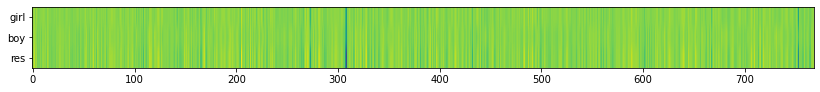

In [65]:
l = "girl"
r = "boy"
l_vec = get_bert_vector(l)
r_vec = get_bert_vector(r)
res = add_bert(l, r)
print(res)
res_vec = l_vec + r_vec
plt.figure(figsize=(14, 14))
le = 3
plt.yticks(range(0, le), [l, r, 'res'])
plt.imshow(np.stack([l_vec.detach().numpy(), r_vec.detach().numpy(), res_vec.detach().numpy()]))
plt.gca().set_aspect(20)
plt.show()

[('doctor', 0.5823711156845093), ('significantly', 0.3295513391494751), ('minute', 0.32255178689956665), ('doorstep', 0.302302747964859), ('fine', 0.30032113194465637), ('suck', 0.29529500007629395), ('confirmed', 0.2912699580192566), ('desperation', 0.2873341143131256), ('agreement', 0.2775416672229767), ('treat', 0.2773798108100891)]


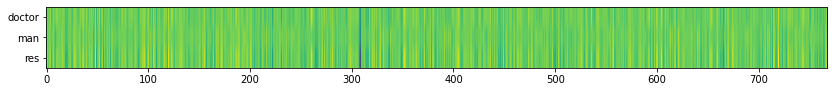

In [64]:
l = "doctor"
r = "man"
l_vec = get_bert_vector(l)
r_vec = get_bert_vector(r)
res = sub_bert(l, r)
print(res)
res_vec = l_vec + r_vec
plt.figure(figsize=(14, 14))
le = 3
plt.yticks(range(0, le), [l, r, 'res'])
plt.imshow(np.stack([l_vec.detach().numpy(), r_vec.detach().numpy(), res_vec.detach().numpy()]))
plt.gca().set_aspect(20)
plt.show()

In [59]:
most_similar_bert("game")

[('game', 1.0),
 ('chat', 0.7403021454811096),
 ('speed', 0.7271244525909424),
 ('virtual', 0.7264401316642761),
 ('movie', 0.7259149551391602),
 ('toy', 0.7231173515319824),
 ('comedy', 0.7229877710342407),
 ('entertainment', 0.7185088992118835),
 ('toilet', 0.7166627049446106),
 ('technology', 0.7161389589309692)]

In [60]:
least_similar_bert("game")

[('warned', -0.09676360338926315),
 ('wearing', -0.08563890308141708),
 ('cool', -0.07934702932834625),
 ('sport', -0.05944693833589554),
 ('hair', -0.043989960104227066),
 ('overwhelming', -0.035549502819776535),
 ('novel', -0.033237021416425705),
 ('smart', -0.030028536915779114),
 ('commercial', -0.02647162601351738),
 ('inventory', -0.02233206294476986)]

In [61]:
import numpy as np
import copy

def restrict_w2v(w2v, restricted_word_set):
    new_vectors = []
    new_index_to_key = []
    new_key_to_index = {}

    for i in range(len(w2v.index_to_key)):
        word = w2v.index_to_key[i]
        vec = w2v.vectors[i]
        if word in restricted_word_set:
            new_key_to_index[word] = len(new_index_to_key)
            new_index_to_key.append(word)
            new_vectors.append(vec)

    w2v.vectors = np.array(new_vectors)
    w2v.index_to_key = np.array(new_index_to_key)
    w2v.key_to_index = new_key_to_index
    w2v.index2word = np.array(new_index_to_key)
    return w2v

restrict_w2v(copy.deepcopy(gmodel.wv), words_freq[:3000]).save_word2vec_format('./temp/model')

!python3 -m gensim.scripts.word2vec2tensor -i ./temp/model -o ./temp/out_tensor

2021-12-22 16:30:06,743 - word2vec2tensor - INFO - running /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/gensim/scripts/word2vec2tensor.py -i ./temp/model -o ./temp/out_tensor
2021-12-22 16:30:06,743 - keyedvectors - INFO - loading projection weights from ./temp/model
2021-12-22 16:30:06,929 - utils - INFO - KeyedVectors lifecycle event {'msg': 'loaded (3000, 100) matrix of type float32 from ./temp/model', 'binary': False, 'encoding': 'utf8', 'datetime': '2021-12-22T16:30:06.897997', 'gensim': '4.1.2', 'python': '3.8.1 (v3.8.1:1b293b6006, Dec 18 2019, 14:08:53) \n[Clang 6.0 (clang-600.0.57)]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'load_word2vec_format'}
2021-12-22 16:30:07,196 - word2vec2tensor - INFO - 2D tensor file saved to ./temp/out_tensor_tensor.tsv
2021-12-22 16:30:07,196 - word2vec2tensor - INFO - Tensor metadata file saved to ./temp/out_tensor_metadata.tsv
2021-12-22 16:30:07,196 - word2vec2tensor - INFO - finished running word2

[http://projector.tensorflow.org/](http://projector.tensorflow.org/)